<a href="https://colab.research.google.com/github/Antra3/SC-CPE31S1_FinalProj/blob/main/SC_CPE31S1_FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 32.5 MB/s eta 0:00:00


Enter the rotation around the X-axis (theta in radians): 5
Enter the phase parameter (phi in radians): 12
Enter the phase parameter (lambda in radians): 6

Statevector Quantum Circuit:
   ┌───────────┐
q: ┤ U(5,12,6) ├
   └───────────┘

Measurement Quantum Circuit:
     ┌───────────┐┌─┐
  q: ┤ U(5,12,6) ├┤M├
     └───────────┘└╥┘
c: 1/══════════════╩═
                   0 

State Vector after U Gate:
Statevector([-0.80114362+0.j        ,  0.50502309-0.32112394j],
            dims=(2,))

Generating 3D Bloch Sphere using qutip...


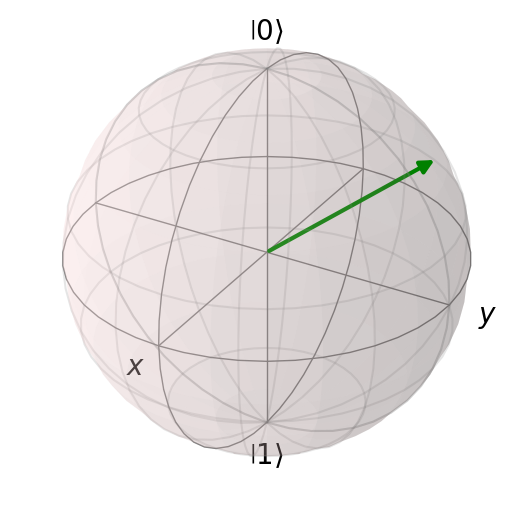


Evolved State Vector (after Hadamard and CNOT gates):
Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))

Density Matrix:
DensityMatrix([[ 0.64183109+0.00000000e+00j, -0.40459602-2.57266398e-01j],
               [-0.40459602+2.57266398e-01j,  0.35816891+2.80799900e-18j]],
              dims=(2,))

Simulating Measurement Probabilities...


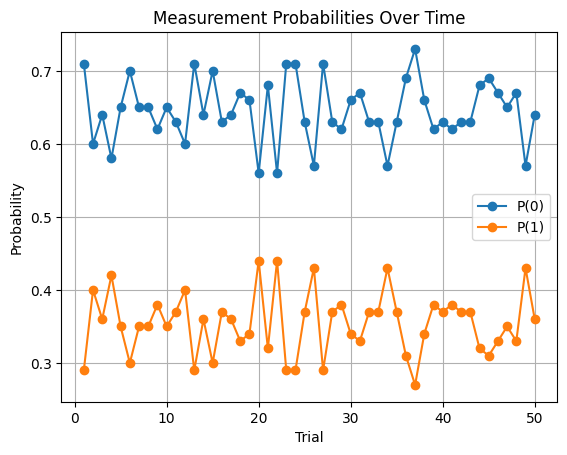


Generating Customized Histogram of Last Trial...


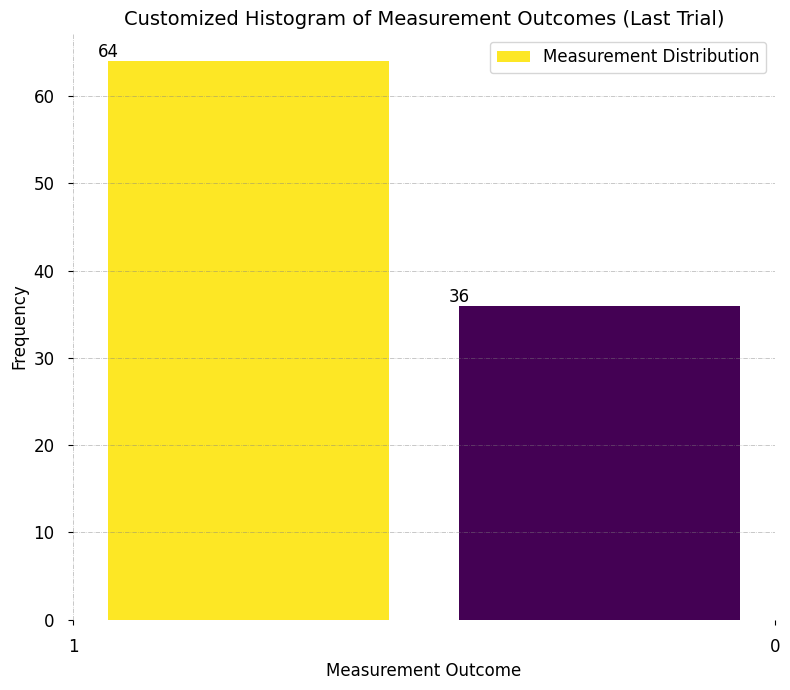

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display, Image as IPImage
from qutip import Bloch, Qobj
from matplotlib import colors

# Function to display images
def show_image(filename):
    try:
        display(IPImage(filename=filename))  # For Jupyter
    except NameError:
        os.system(f'start {filename}')  # For Windows

        # os.system(f'open {filename}')  # For macOS

# Function to plot a 3D Bloch sphere using qutip
def plot_bloch_qutip(statevector):
    # Convert Qiskit's statevector to qutip's Qobj
    qutip_state = Qobj(statevector.data)

    # Create a Bloch sphere using qutip
    b = Bloch()

    # Add the statevector to the Bloch sphere
    b.add_states(qutip_state)

    # Show the Bloch sphere
    b.show()

# Input parameters with defaults
try:
    theta = float(input("Enter the rotation around the X-axis (theta in radians): "))
    phi = float(input("Enter the phase parameter (phi in radians): "))
    lam = float(input("Enter the phase parameter (lambda in radians): "))
except ValueError:
    print("Invalid input detected, using default values.")
    theta, phi, lam = 1.5708, 0, 0  # Defaults to pi/2, 0, 0

# Quantum circuit for statevector simulation
statevector_qc = QuantumCircuit(1)
statevector_qc.u(theta, phi, lam, 0)

# Quantum circuit for measurement simulation
measurement_qc = QuantumCircuit(1, 1)
measurement_qc.u(theta, phi, lam, 0)
measurement_qc.measure(0, 0)

print("\nStatevector Quantum Circuit:")
print(statevector_qc)
print("\nMeasurement Quantum Circuit:")
print(measurement_qc)

# Simulate using AerSimulator
simulator = AerSimulator(method='statevector')
transpiled_statevector_qc = transpile(statevector_qc, simulator)
statevector = Statevector.from_instruction(transpiled_statevector_qc)

# Ensure statevector is valid
if not statevector.is_valid():
    print("Warning: Statevector is not normalized. Normalizing...")
    statevector = statevector.normalize()

# Display statevector
print("\nState Vector after U Gate:")
print(statevector)

# Visualize 3D Bloch Sphere using qutip
print("\nGenerating 3D Bloch Sphere using qutip...")
try:
    plot_bloch_qutip(statevector)
except Exception as e:
    print(f"Error plotting Bloch Sphere using qutip: {e}")

# --- Updated Q-sphere Representation with New State Evolution ---
# Create the initial statevector |01⟩
sv = Statevector.from_label('01')  # Initial state is |01⟩

# Define the quantum circuit with Hadamard and CNOT gates
mycircuit = QuantumCircuit(2)
mycircuit.h(0)  # Apply Hadamard gate to qubit 0
mycircuit.cx(0, 1)  # Apply CNOT gate with control qubit 0 and target qubit 1

# Evolve the statevector using the quantum circuit
new_sv = sv.evolve(mycircuit)

# Print evolved statevector
print("\nEvolved State Vector (after Hadamard and CNOT gates):")
print(new_sv)

# Get density matrix
density_matrix = DensityMatrix(statevector)
print("\nDensity Matrix:")
print(density_matrix)

# Measurement probabilities
trials = 50
shots_per_trial = 100
outcomes_over_time = []

# Simulate measurement over multiple trials
print("\nSimulating Measurement Probabilities...")
measurement_simulator = AerSimulator()
last_counts = None  # To store the counts of the last trial
for trial in range(trials):
    result = measurement_simulator.run(transpile(measurement_qc, measurement_simulator), shots=shots_per_trial).result()
    counts = result.get_counts()
    if trial == trials - 1:  # Save the counts of the last trial
        last_counts = counts
    prob_0 = counts.get('0', 0) / shots_per_trial
    prob_1 = counts.get('1', 0) / shots_per_trial
    outcomes_over_time.append((prob_0, prob_1))

# Convert to numpy array for plotting
outcomes_array = np.array(outcomes_over_time)

# Plot probabilities over time
plt.figure()
plt.plot(range(1, trials + 1), outcomes_array[:, 0], label="P(0)", marker="o")
plt.plot(range(1, trials + 1), outcomes_array[:, 1], label="P(1)", marker="o")
plt.xlabel("Trial")
plt.ylabel("Probability")
plt.title("Measurement Probabilities Over Time")
plt.legend()
plt.grid(True)
plt.savefig('measurement_probabilities_over_time.png')
plt.show()

# --- Updated Customized Histogram of Last Trial ---
print("\nGenerating Customized Histogram of Last Trial...")
if last_counts:
    # Extract data for histogram
    outcomes = list(last_counts.keys())
    frequencies = list(last_counts.values())

    # Creating dataset for histogram
    data = []
    for outcome, freq in zip(outcomes, frequencies):
        data.extend([outcome] * freq)

    # Convert to numerical format for plotting
    data = [0 if outcome == '0' else 1 for outcome in data]  # Map '0' -> 0, '1' -> 1

    # Custom Histogram Plot
    fig, axs = plt.subplots(1, 1, figsize=(8, 7), tight_layout=True)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        axs.spines[s].set_visible(False)

    # Set x, y ticks
    axs.xaxis.set_ticks_position('bottom')
    axs.yaxis.set_ticks_position('left')

    # Add padding between axes and labels
    axs.xaxis.set_tick_params(pad=10)
    axs.yaxis.set_tick_params(pad=10)

    # Add x, y gridlines
    axs.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.6)

    # Add Text watermark
    fig.text(0.9, 0.15, '', fontsize=12, color='red', ha='right', va='bottom', alpha=0.7)

    # Creating histogram
    N, bins, patches = axs.hist(data, bins=len(outcomes), align='mid', rwidth=0.8)

    # Setting color
    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    # Add frequencies as text labels on top of the bars
    for i in range(len(N)):
        axs.text(bins[i] + 0.05, N[i], f'{int(N[i])}', ha='center', va='bottom', fontsize=12)

    # Adding extra features
    axs.set_xlabel("Measurement Outcome", fontsize=12)
    axs.set_ylabel("Frequency", fontsize=12)
    axs.set_xticks(range(len(outcomes)))
    axs.set_xticklabels(outcomes, fontsize=12)
    axs.tick_params(axis='y', labelsize=12)

    plt.title("Customized Histogram of Measurement Outcomes (Last Trial)", fontsize=14)
    plt.legend(["Measurement Distribution"], fontsize=12)

    # Save and show the plot
    plt.savefig('customized_measurement_histogram.png')
    plt.show()
else:
    print("No measurement results found. Ensure the quantum circuit has a measurement step.")